# Predictive Analysis of High-Dimensional Data using dimensionality reduction techniques like PCA, t-SNE, ISOMAP & kernel-PCA

<h2>Problem Statement: </h2>

1. We receive a dataset with 400 unique datapoints and 501 variables 

2. This is a dataset with binary response 0 vs 1, i.e, a classification problem

<b> About the Dataset: </b>
The Dataset was provided by Prof Yang Ni, Assistant Professor, Department of Statistics at Texas A&M University, College Station as a part of Academic work for course STAT 639.

<h3>Approach </h3>

    1. Data Exploration
    2. Exploration of dimensionality reduction techniques
    3. Modeling the data 

<h3> Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X = pd.read_csv('X.csv')
Y= pd.read_csv('y.csv')
Y=np.ravel(Y)

<h3> Finding the dimension of the Data

In [3]:
X.shape

(400, 501)

We can say that the dimensionality of this data is very high and in fact the number of variables is larger than the number of data points (Case of p>n). This make the direct use of learning techniques like Logistic Regression on this data impossible. Also, k-nearest neighbor is also not feasible because it performs poorly for high dimensional data. For such a high dimensional data, we must eventually try to implement dimensionality reduction.

In [4]:
X.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,1,-19.5440,-50.041,-12.4400,15.396,8.544,40.697,-3.4604,44.697,13.343,...,5.3493,15.2220,43.3900,43.482,50.616,24.0100,27.9300,28.4370,31.9570,17.834
1,2,9.0592,47.432,70.6130,49.852,-40.718,52.524,7.6062,-23.855,56.290,...,1.1910,-1.9848,10.4450,91.927,71.315,-6.9126,22.6940,-37.0030,5.1888,-34.001
2,3,12.2040,71.596,31.1370,46.268,-119.170,44.195,-9.4291,-30.552,-35.549,...,6.7521,-4.5523,72.6330,89.487,81.504,17.0010,-36.2150,90.1110,23.9440,26.624
3,4,0.9555,52.053,-1.5588,74.192,-19.963,43.077,17.9140,32.502,107.040,...,20.7880,34.2090,6.0297,-26.306,41.035,9.1317,25.0640,50.8340,3.0479,-26.706
4,5,-3.0805,113.680,-5.7704,55.302,25.336,53.647,-5.9736,12.721,94.911,...,10.3620,2.5443,12.6930,36.712,18.450,10.5340,-2.4118,-2.0924,20.2780,-23.395


In [5]:
X.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,8.070998,17.756255,13.688378,31.303252,0.974233,12.882195,1.291308,25.884472,11.297779,...,6.408584,12.120813,15.860986,28.151299,32.473912,7.742940,6.218524,32.733134,8.228898,8.592517
std,115.614301,13.516664,77.830590,29.135308,39.754872,54.656737,39.740809,9.349959,57.097305,74.501896,...,7.788837,19.834244,28.116514,89.468923,40.306931,8.309813,18.788219,31.519112,15.606473,49.084699
min,1.000000,-43.095000,-220.910000,-89.947000,-69.460000,-160.850000,-113.840000,-29.472000,-145.200000,-246.890000,...,-16.100000,-46.732000,-74.981000,-304.710000,-98.979000,-16.868000,-61.735000,-52.953000,-35.331000,-137.090000
25%,100.750000,-0.910902,-37.335500,-4.419350,7.787400,-34.691500,-16.602750,-5.358700,-12.681750,-38.011250,...,1.478550,-1.795100,-3.589025,-32.973250,8.244275,2.564175,-6.629875,11.839250,-1.779575,-22.789750
50%,200.500000,8.099700,21.775500,11.967500,27.364000,2.237600,13.335000,1.290150,28.452500,10.314500,...,6.155750,11.909000,16.542500,30.924500,29.769500,8.372900,5.444450,31.653000,7.596900,8.239600
75%,300.250000,18.546250,72.153000,32.841000,55.467500,39.488500,40.830000,7.638075,61.172750,62.895750,...,11.503000,25.909500,34.594000,88.466250,60.543500,12.741750,18.176000,54.320750,17.749250,39.552500
max,400.000000,40.947000,213.030000,109.610000,172.790000,149.820000,130.630000,23.678000,214.180000,245.950000,...,32.599000,70.273000,108.100000,299.170000,167.450000,31.427000,60.368000,126.400000,51.490000,171.680000


We check the proportion of 0 and 1 in order to check whether it is rare event phenomenon.

In [10]:
Y

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,

We can see that distribution is fairly even and it is not a case of unbalanced data.

Now we check whether there are any missing values.

In [19]:
X.isnull().sum().sum()

0

There are none. We will now visually inspect some of the variables and check their spread.

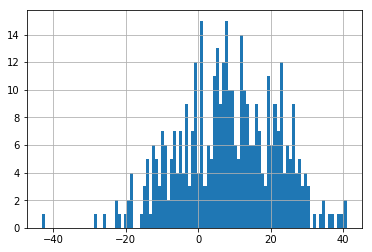

In [2]:
X1 = X.iloc[:,1]
hist = X1.hist(bins=100)

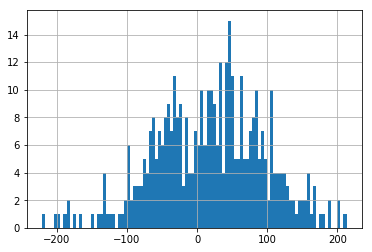

In [3]:
X2 = X.iloc[:,2]
hist = X2.hist(bins=100)

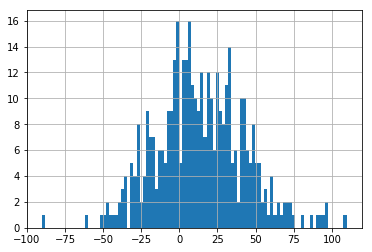

In [4]:
X3 = X.iloc[:,3]
hist = X3.hist(bins=100)

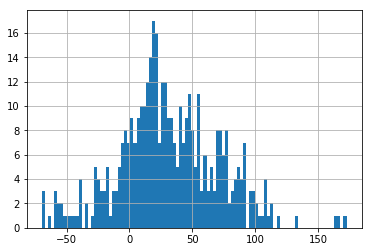

In [5]:
X4 = X.iloc[:,4]
hist = X4.hist(bins=100)

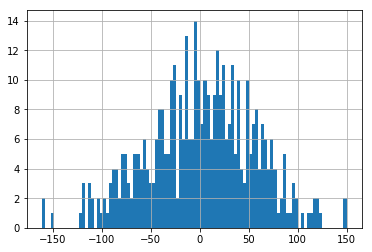

In [6]:
X5 = X.iloc[:,5]
hist = X5.hist(bins=100)

Looks fairly vanilla for now. Now we check if any individual variables are strongly correlated with the outcome and how are they indivdually balanced.

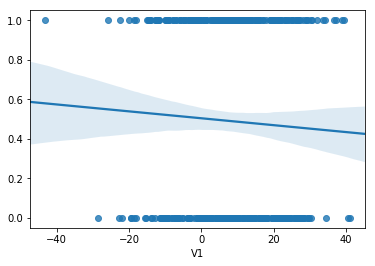

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x=X.iloc[:,1], y=Y)

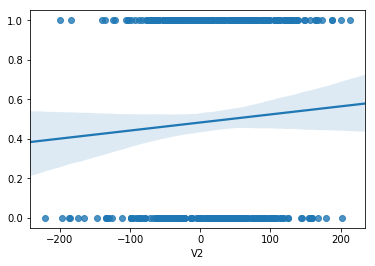

In [28]:
sns.regplot(x=X.iloc[:,2], y=Y)

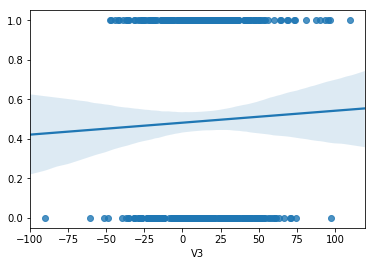

In [30]:
sns.regplot(x=X.iloc[:,3], y=Y)

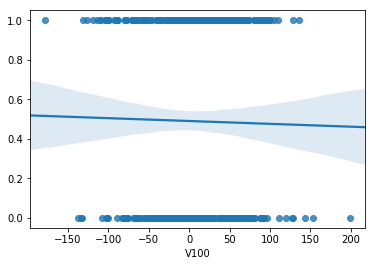

In [31]:
sns.regplot(x=X.iloc[:,100], y=Y)

We find that in some random variables, the outcomes are fairly balanced and did not notice any stark correlations with any individual variable.
As a next step, we attempt to find the coorelation matrix between variables.
We can visually see that most numbers are near to zero, but also realize the futility of the exercise when the number of variables are so high.

In [2]:
# Computation of the correlation matrix
import math
corr = X.corr()
corr

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
Unnamed: 0,1.000000,0.013042,-0.065473,0.007264,0.044797,0.059184,0.063707,0.049922,0.041841,0.044619,...,-0.068864,0.044570,0.026116,-0.033239,0.017410,-0.082550,0.006935,-0.037777,-0.055800,0.070691
V1,0.013042,1.000000,-0.063827,-0.012339,0.047379,0.067691,0.023979,-0.087749,0.024634,-0.039372,...,-0.043251,0.018670,0.000341,0.021565,0.051421,0.037175,-0.035033,-0.024990,-0.044314,0.009132
V2,-0.065473,-0.063827,1.000000,-0.024309,-0.001465,0.007784,-0.035452,0.065651,-0.017561,0.054876,...,0.038628,-0.089020,-0.015902,-0.004095,-0.127086,-0.004643,0.016444,0.065035,-0.019239,0.009002
V3,0.007264,-0.012339,-0.024309,1.000000,0.086120,-0.027809,-0.010803,0.009015,0.012851,-0.012063,...,0.000793,-0.027140,0.003018,0.030354,0.101102,-0.045982,-0.004177,-0.065801,0.076156,0.063439
V4,0.044797,0.047379,-0.001465,0.086120,1.000000,0.022399,0.014700,-0.034181,0.028768,-0.050352,...,-0.079423,0.037755,-0.000134,-0.023641,-0.002069,0.087251,-0.021610,0.009945,-0.049588,0.033884
V5,0.059184,0.067691,0.007784,-0.027809,0.022399,1.000000,-0.088976,0.036494,0.016380,-0.014051,...,-0.021853,0.037181,-0.071423,-0.035008,0.143592,0.034066,0.027797,-0.027994,0.061160,0.059354
V6,0.063707,0.023979,-0.035452,-0.010803,0.014700,-0.088976,1.000000,-0.035688,0.003441,-0.019757,...,0.060124,-0.007329,-0.073134,0.015785,0.022522,0.012300,0.038716,0.021667,0.027300,-0.075853
V7,0.049922,-0.087749,0.065651,0.009015,-0.034181,0.036494,-0.035688,1.000000,0.083489,0.007290,...,-0.024697,-0.065110,0.001673,-0.087563,-0.095906,-0.034351,0.057726,0.034885,-0.029753,0.014358
V8,0.041841,0.024634,-0.017561,0.012851,0.028768,0.016380,0.003441,0.083489,1.000000,0.040052,...,-0.074341,-0.119191,0.039800,-0.027699,0.005894,-0.037217,0.025203,0.000043,0.047412,-0.171297
V9,0.044619,-0.039372,0.054876,-0.012063,-0.050352,-0.014051,-0.019757,0.007290,0.040052,1.000000,...,-0.033759,-0.034571,-0.021957,0.056204,-0.074226,-0.011651,0.011923,0.048648,-0.151093,-0.044660


Before we head into any data manipulation or dimensionality reduction, we try to directly model the data to find what results we get. We try different techniques like Neural Networks, Random Forest and Decision Trees with k-folds cross validation.

In [11]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X,Y)
    scores_nn = cross_val_score(fnn, X, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.6171616658852946
Mean scores for network (128, 128, 10)  is  0.5597526957337083


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =10)
rf.fit(X, Y)
scores_rf = cross_val_score(rf, X, Y, cv=5)
scores_rf.mean()

0.5848167682450383

In [46]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X,Y)
    scores_tree = cross_val_score(DT, X, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.7221663541178309
Depth 4 Mean Error 0.6900074230348492
Depth 5 Mean Error 0.6998855289889044
Depth 6 Mean Error 0.6948230192217533
Depth 7 Mean Error 0.6849171745585247
Depth 8 Mean Error 0.6875398499765588
Depth 9 Mean Error 0.6972921550242225
Depth 10 Mean Error 0.6799773402094077
Depth 11 Mean Error 0.6824472573839662
Depth 12 Mean Error 0.6750082044069385
Depth 13 Mean Error 0.6799156118143459
Depth 14 Mean Error 0.6950414127207376
Depth 15 Mean Error 0.6949472573839662


Here for printing out the cross validation metrices, we use cross_val_score with k-folds Cross Validation to find the performance of the models. We see that most of these models are performing very poorly. 
For example, with Random Forest we get an error close to 50%, which means it is not performing much better than a fair coin toss.

We realize that we need to work with this data in some way to improve the performance of the models. We start by performing a Standard scaling operation on the data. Standard Scaling scales the data to a mean of zero and a standard deviation of 1.

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


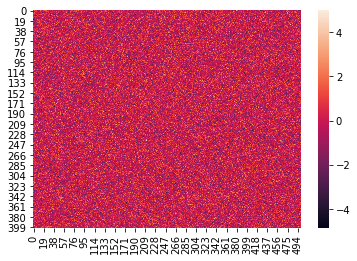

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
sns.heatmap(pd.DataFrame(X_scaled))

We conduct a PCA analysis on our data. PCA analyzes a data table representing observations described by several dependent variables, which are, in general, inter-correlated. Its goal is to extract the important information from the data
table and to express this information as a set of new orthogonal variables called principal components.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [49]:
pca.n_components_

265

We see that PCA has reduced the number of variables from 501 to 265. We will now apply the same modeling techniques that we used earlier on the new data after PCA.

In [50]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_pca,Y)
    scores_nn = cross_val_score(fnn, X_pca, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.622289029535865
Mean scores for network (128, 128, 10)  is  0.6200699328020003


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =1000)
rf.fit(X_pca, Y)
scores_rf = cross_val_score(rf, X_pca, Y, cv=5)
scores_rf.mean()

0.5973784966401

In [52]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X_pca,Y)
    scores_tree = cross_val_score(DT, X_pca, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.5600328176277543
Depth 4 Mean Error 0.5400335989998437
Depth 5 Mean Error 0.524938662290983
Depth 6 Mean Error 0.5624417877793404
Depth 7 Mean Error 0.5399726519768714
Depth 8 Mean Error 0.5498784966401
Depth 9 Mean Error 0.5324402250351618
Depth 10 Mean Error 0.5273468510704797
Depth 11 Mean Error 0.524845288326301
Depth 12 Mean Error 0.5549410064072511
Depth 13 Mean Error 0.534907798093452
Depth 14 Mean Error 0.5474417877793406
Depth 15 Mean Error 0.5347526957337084


We find again that most of these models performed poorly. For example, Random Forest got us an error close to 50%, which means it is not performing much better than a fair coin toss.

Next we try to employ t-SNE for dimensionality reduction. 
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

#TSNE

In [53]:
from sklearn.manifold import TSNE
X_e = TSNE(n_components=3).fit_transform(X)
X_e.shape

(400, 3)

In [54]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_e,Y)
    scores_nn = cross_val_score(fnn, X_e, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.5726609626504142
Mean scores for network (128, 128, 10)  is  0.5949093608376309


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =1000)
rf.fit(X_e, Y)
scores_rf = cross_val_score(rf, X_e, Y, cv=5)
scores_rf.mean()

0.6175699328020003

In [56]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X_e,Y)
    scores_tree = cross_val_score(DT, X_e, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.5975406313486482
Depth 4 Mean Error 0.5875082044069385
Depth 5 Mean Error 0.6026316611970621
Depth 6 Mean Error 0.6103207532426942
Depth 7 Mean Error 0.582569151429911
Depth 8 Mean Error 0.5901633067666823
Depth 9 Mean Error 0.5901625253945928
Depth 10 Mean Error 0.5826933895921238
Depth 11 Mean Error 0.577725035161744
Depth 12 Mean Error 0.590225035161744
Depth 13 Mean Error 0.577725035161744
Depth 14 Mean Error 0.590225035161744
Depth 15 Mean Error 0.5776625253945928


We find again that most of these models performed poorly. The models get us an error close to 50%, which means it is not performing much better than a fair coin toss.
Next we try to employ Isomap for dimensionality reduction. Isomap is a nonlinear dimensionality reduction method.

#ISOMAP

In [ ]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=5)
X_I = embedding.fit_transform(X)
X_I.shape

In [58]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_I,Y)
    scores_nn = cross_val_score(fnn, X_I, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.5773515393030161
Mean scores for network (128, 128, 10)  is  0.5175621190811064


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =1000)
rf.fit(X_I, Y)
scores_rf = cross_val_score(rf, X_I, Y, cv=5)
scores_rf.mean()

0.629915611814346

In [60]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X_e,Y)
    scores_tree = cross_val_score(DT, X_e, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.5975406313486482
Depth 4 Mean Error 0.5875082044069385
Depth 5 Mean Error 0.592631661197062
Depth 6 Mean Error 0.6103207532426942
Depth 7 Mean Error 0.592600796999531
Depth 8 Mean Error 0.5901633067666823
Depth 9 Mean Error 0.5951941709642131
Depth 10 Mean Error 0.587725035161744
Depth 11 Mean Error 0.582725035161744
Depth 12 Mean Error 0.597725035161744
Depth 13 Mean Error 0.582662525394593
Depth 14 Mean Error 0.587725035161744
Depth 15 Mean Error 0.587662525394593


We find again that most of these models performed poorly. The models get us an error close to 50%, which means it is not performing much better than a fair coin toss. Next we try to employ non-Linear PCA techniques for dimensionality reduction. We start with rbf boundary.

In [64]:
from sklearn.decomposition import PCA, KernelPCA
gam = [0.5, 1, 5, 8, 10]
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
X_back

array([[  0.50004133,  -9.77199833, -25.02049631, ...,  14.21850673,
         15.97850168,   8.91700176],
       [  1.00004133,   4.52960166,  23.71600364, ..., -18.50149323,
          2.59440169, -17.00049821],
       [  1.50004132,   6.10200166,  35.79800362, ...,  45.0555067 ,
         11.97200168,  13.31200176],
       ...,
       [199.00004112,   6.41350166,  24.84750363, ...,  30.74400672,
          1.0428517 , -65.69999816],
       [199.50004112,  -2.56959833,  46.84850361, ...,  31.35000671,
         14.85800168,  25.15800175],
       [200.00004112,   4.04515166, -43.7239963 , ..., -12.51499324,
         12.02050168,   8.05450176]])

In [65]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_back,Y)
    scores_nn = cross_val_score(fnn, X_back, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.632629317080794
Mean scores for network (128, 128, 10)  is  0.5849417877793405


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =1000)
rf.fit(X_back, Y)
scores_rf = cross_val_score(rf, X_back, Y, cv=5)
scores_rf.mean()

0.7372636349429598

In [67]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X_back,Y)
    scores_tree = cross_val_score(DT, X_back, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.7098206751054852
Depth 4 Mean Error 0.6774757774652289
Depth 5 Mean Error 0.7148245819659321
Depth 6 Mean Error 0.687355446163463
Depth 7 Mean Error 0.6948855289889044
Depth 8 Mean Error 0.697478121581497
Depth 9 Mean Error 0.6698831848726365
Depth 10 Mean Error 0.6948855289889044
Depth 11 Mean Error 0.6922921550242226
Depth 12 Mean Error 0.6874472573839663
Depth 13 Mean Error 0.6949480387560557
Depth 14 Mean Error 0.6948546647913736
Depth 15 Mean Error 0.6950406313486482


Next, we try to employ linear kernel with 10 components. 

In [68]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=10, kernel='linear')
X_t = transformer.fit_transform(X)
X_t.shape

(400, 10)

In [69]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
network_list = [(128,10),(128,128,10)]
#network_list = [(7,6),(8,7)]
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=100000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_t,Y)
    scores_nn = cross_val_score(fnn, X_t, Y, cv=5)
    print("Mean scores for network", nn, " is ", scores_nn.mean())
    

Mean scores for network (128, 10)  is  0.7498917799656196
Mean scores for network (128, 128, 10)  is  0.7876426004063134


In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_estimators =1000)
rf.fit(X_t, Y)
scores_rf = cross_val_score(rf, X_t, Y, cv=5)
scores_rf.mean()

0.7850777465228943

In [71]:
from sklearn.tree import DecisionTreeClassifier
depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for b in depth:
    DT = DecisionTreeClassifier(max_depth=b, min_samples_split=5, min_samples_leaf=5)
    DT = DT.fit(X_t,Y)
    scores_tree = cross_val_score(DT, X_t, Y, cv=5)
    print("Depth", b, "Mean Error", scores_tree.mean())

Depth 3 Mean Error 0.6926695577433974
Depth 4 Mean Error 0.7074804656977653
Depth 5 Mean Error 0.7049496015002343
Depth 6 Mean Error 0.7100144553836537
Depth 7 Mean Error 0.7175144553836537
Depth 8 Mean Error 0.7175453195811845
Depth 9 Mean Error 0.7175453195811845
Depth 10 Mean Error 0.7175453195811845
Depth 11 Mean Error 0.7100453195811846
Depth 12 Mean Error 0.707482028441944
Depth 13 Mean Error 0.7124820284419441
Depth 14 Mean Error 0.7125453195811845
Depth 15 Mean Error 0.7024820284419441


In [72]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt', objective='binary',
                       num_class=1,num_leaves=31,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=1,max_depth=10,
                       learning_rate=0.02, n_estimators=5000, max_bin=255, subsample_for_bin=50000, 
                       min_split_gain=0.1, min_child_weight=0.1, min_child_samples=1, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=50, seed=0, nthread=-1, silent=True)
lgb = model.fit(X_t, Y)
scores_lgbm = cross_val_score(lgb, X_t, Y, cv=5)
scores_lgbm.mean()

0.7699527269885921

In [73]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier( booster = 'dart',
 learning_rate =0.01,
 n_estimators=3000,
 max_depth=100,
 min_child_weight=1,
 gamma=0.01,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb = model.fit(X_t, Y)
scores_xgb = cross_val_score(xgb, X_t, Y, cv=5)
scores_xgb.mean()

0.8051441631504922

In [74]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                         algorithm="SAMME",
                         n_estimators=3000)
adb = bdt.fit(X_t, Y)
scores_adb = cross_val_score(adb, X_t, Y, cv=5)
scores_adb.mean()

0.705012892639475

We get some good results with the kernel-PCA. We try different models with the data. The top 3 models that give us good result so far are,
1. XGBoost Classifier
2. Random Forest Classifier
3. Light GBM
Since the tree based methods give us the best results, we can assume that the function it is trying to approximate is highly non linear in nature.

# Recap
1. We explored different dimensionality reduction techniques like PCA, ISOMAP, t-SNE, Kernel PCA. But in no whay, these are the only techniques for dimensionality reduction available for a Data Scientist. 
2. We explored different modeling techniques and realized that tree based techniques give us a better result and even better than Neural Network. This tells us that the function that it is trying to approximate is highly non linear in nature.

References:
1. https://www.utdallas.edu/~herve/abdi-awPCA2010.pdf
2. https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf
3. https://web.mit.edu/cocosci/isomap/isomap.html